# Proyecto Final - Churn


*   Josué Ruiz - 20210418
*   Esteban Alonso - 20210421
* Sebastian Rivera - 20210398
* Stephanie Grotewold - 20210567



En este archivo se encontrará el código para limpiar el data set de churn de un banco en Europa. Luego se analizan los datos, y  se utilizan los siguientes modelos random forest, logistic regression, KNN, SVC y gradient boost para predecir que clientes abandonaran el banco.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as sb
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
df = pd.read_csv('churn.csv')


In [ ]:
print(df.shape)

(10000, 14)


In [ ]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:

print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [ ]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [ ]:
print(df.nunique())

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [ ]:

print(df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


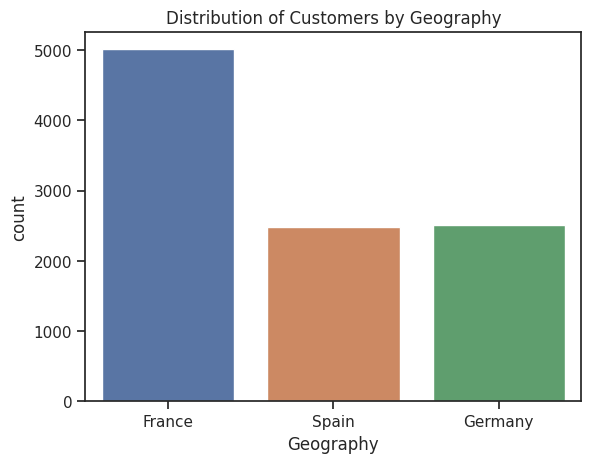

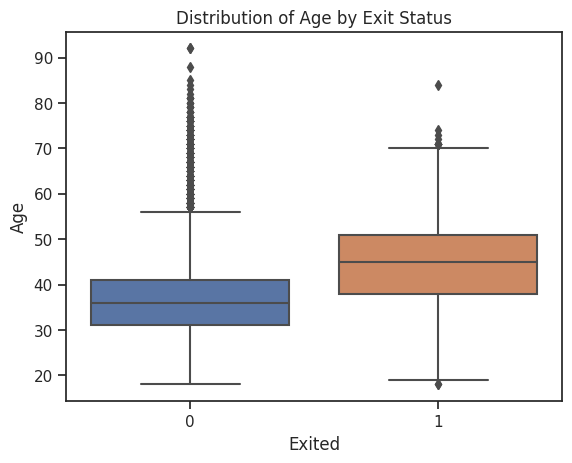

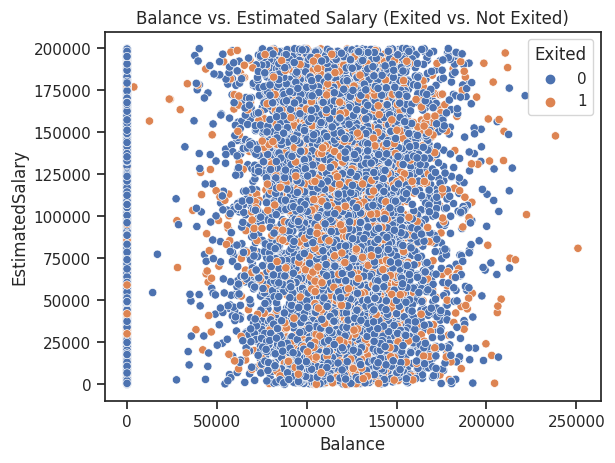

In [ ]:
sns.countplot(x='Geography', data=df)
plt.title('Distribution of Customers by Geography')
plt.show()

sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Distribution of Age by Exit Status')
plt.show()

sns.scatterplot(x='Balance', y='EstimatedSalary', hue='Exited', data=df)
plt.title('Balance vs. Estimated Salary (Exited vs. Not Exited)')
plt.show()

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler


df = pd.read_csv('churn.csv')


X = df.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']


ros = RandomOverSampler(sampling_strategy=0.7,random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print("\nBalanced dataset:")
print(df_resampled['Exited'].value_counts())



Balanced dataset:
0    7963
1    5574
Name: Exited, dtype: int64


In [ ]:
df = df_resampled.copy()

<ipython-input-190-d950ab94d1bd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>, <Axes: >, <Axes: >]],
      dtype=object)

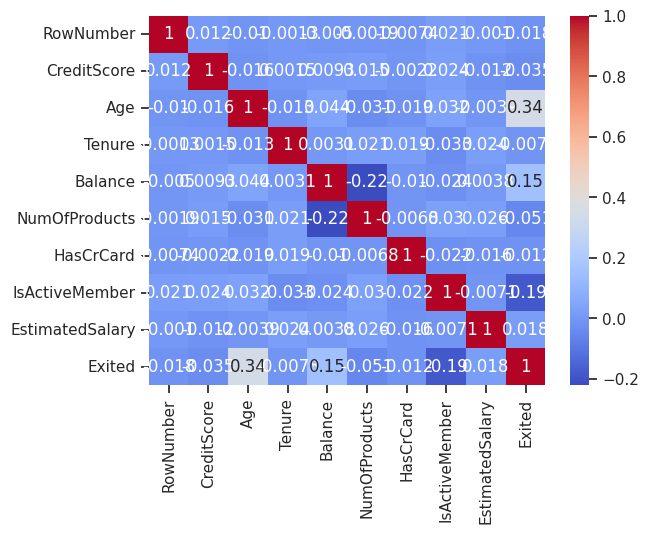

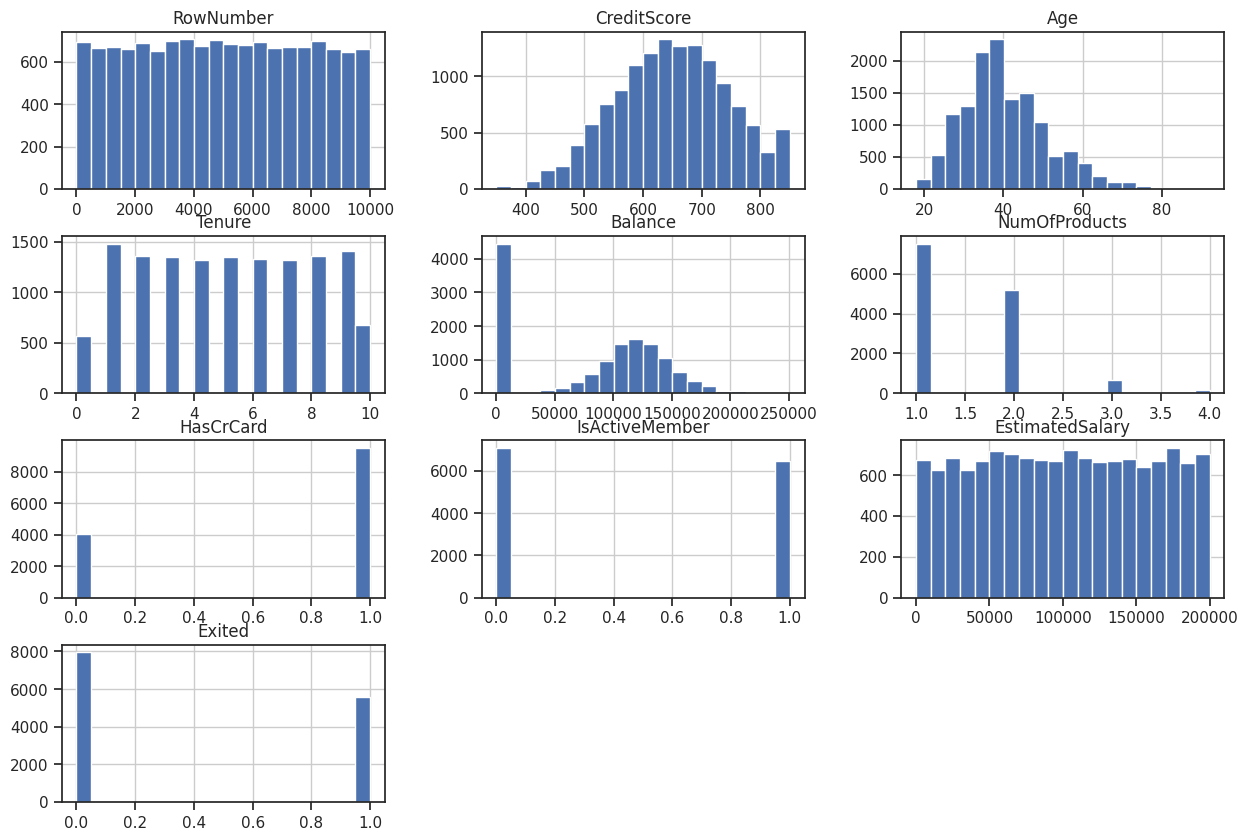

In [ ]:
sns.countplot(x='Exited', data=df)

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

df.hist(bins=20, figsize=(15,10))


<ipython-input-191-0240dd09c10a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


   RowNumber  CreditScore Geography  Age    Balance  NumOfProducts  HasCrCard  \
0          1          619    France   42       0.00              1          1   
1          2          608     Spain   41   83807.86              1          0   
2          3          502    France   42  159660.80              3          1   
3          4          699    France   39       0.00              2          0   
4          5          850     Spain   43  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0  


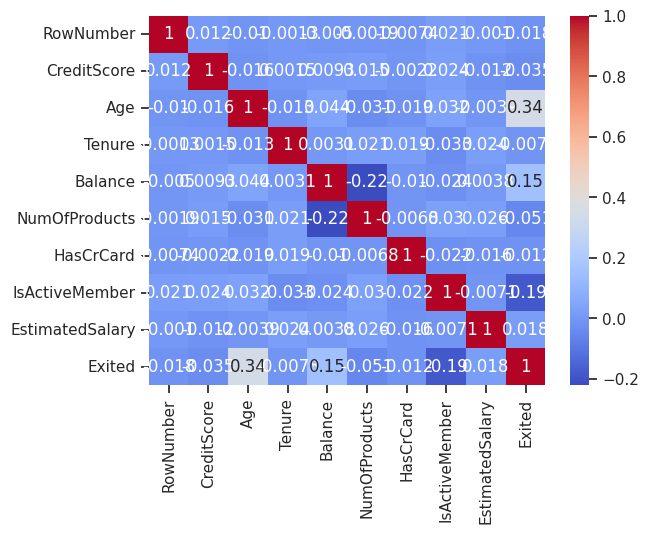

In [ ]:

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

df = df.drop(['Gender', 'Tenure'], axis=1)


print(df.head())


In [ ]:
corr_matrix = df.corr()
print(corr_matrix)


                 RowNumber  CreditScore       Age   Balance  NumOfProducts  \
RowNumber         1.000000     0.012284 -0.010248 -0.005029      -0.001902   
CreditScore       0.012284     1.000000 -0.016083  0.009328       0.014862   
Age              -0.010248    -0.016083  1.000000  0.044053      -0.030685   
Balance          -0.005029     0.009328  0.044053  1.000000      -0.220938   
NumOfProducts    -0.001902     0.014862 -0.030685 -0.220938       1.000000   
HasCrCard        -0.007367    -0.002235 -0.018955 -0.010366      -0.006767   
IsActiveMember    0.020639     0.024439  0.032469 -0.023745       0.030434   
EstimatedSalary  -0.000995    -0.011757 -0.003865  0.003817       0.026215   
Exited           -0.017714    -0.034903  0.344575  0.153266      -0.050887   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
RowNumber        -0.007367        0.020639        -0.000995 -0.017714  
CreditScore      -0.002235        0.024439        -0.011757 -0.034903  
Age

<ipython-input-192-ed094f514566>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

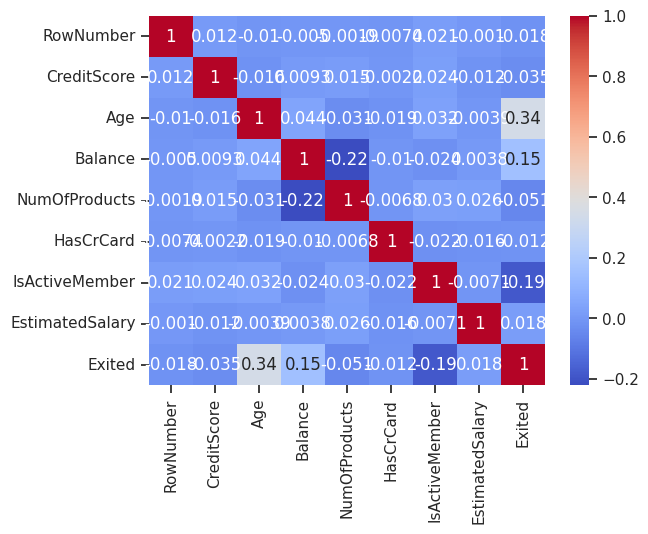

In [ ]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

In [ ]:
df = pd.get_dummies(df, columns=['Geography'])

print(df.head())

from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(X_train[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
X_test[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.transform(X_test[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']])


   RowNumber  CreditScore  Age    Balance  NumOfProducts  HasCrCard  \
0          1          619   42       0.00              1          1   
1          2          608   41   83807.86              1          0   
2          3          502   42  159660.80              3          1   
3          4          699   39       0.00              2          0   
4          5          850   43  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  
0                  0                0  
1                  0                1  
2                  0                0  
3                  0        

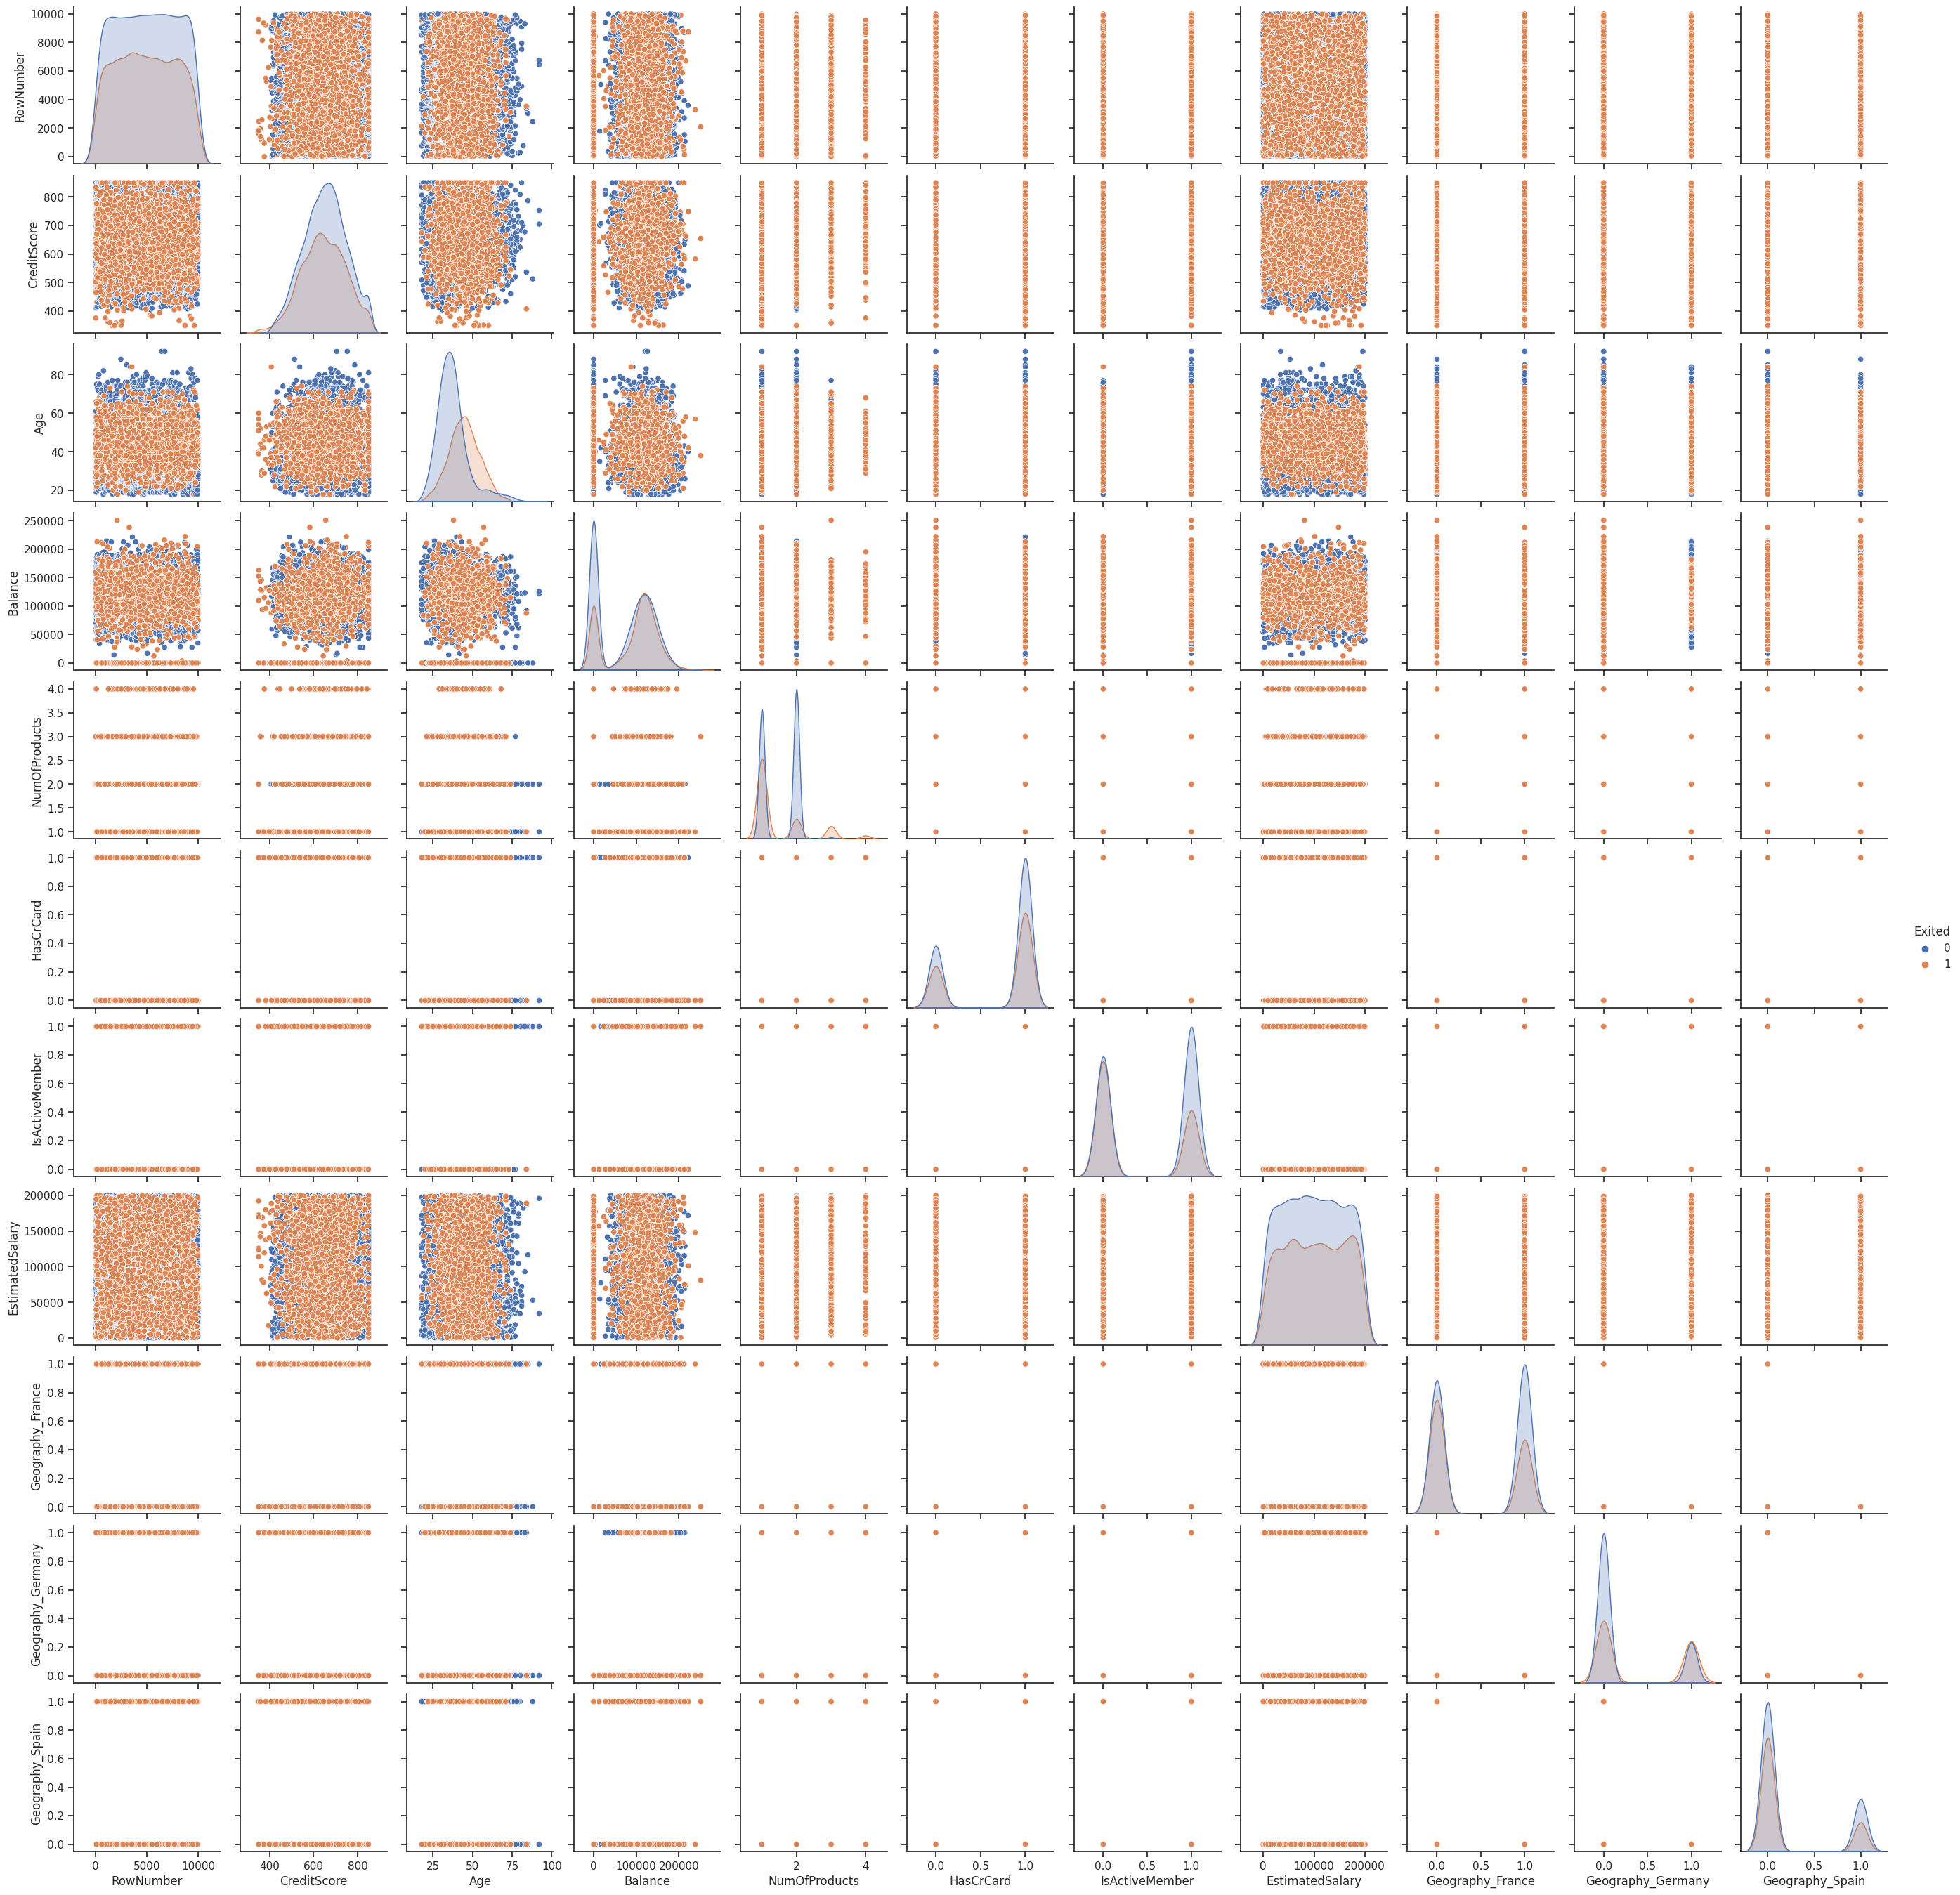

In [ ]:
sns.set_theme(style="ticks")

print(sns.pairplot(df, hue="Exited"))

#Log regression

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1600
           1       0.66      0.53      0.59      1108

    accuracy                           0.70      2708
   macro avg       0.69      0.67      0.67      2708
weighted avg       0.69      0.70      0.69      2708

[[1298  302]
 [ 519  589]]
0.696824224519941


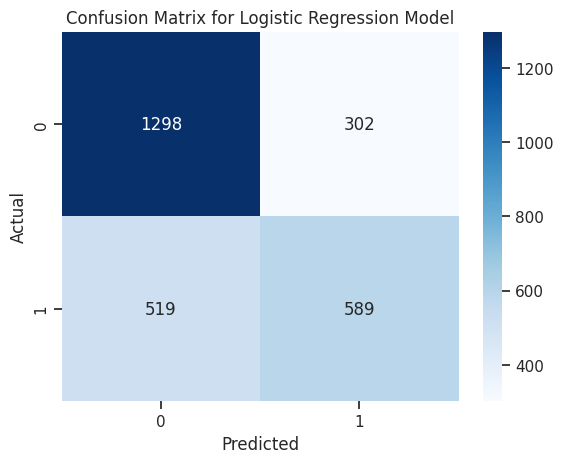

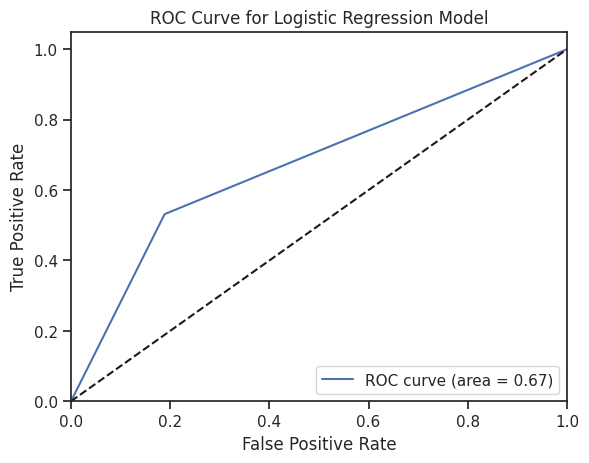

            Predictor  Coefficient  Odds Ratio
0           RowNumber    -0.000020    0.999980
1         CreditScore    -0.081027    0.922169
2                 Age     0.798805    2.222882
3             Balance     0.347806    1.415958
4       NumOfProducts    -0.120202    0.886741
5           HasCrCard    -0.063992    0.938013
6      IsActiveMember    -0.252178    0.777106
7     EstimatedSalary     0.040455    1.041285
8    Geography_France    -0.196340    0.821733
9   Geography_Germany     0.200994    1.222617
10    Geography_Spain    -0.084610    0.918870


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred_lr = model.predict(X_test)


print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))


cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


fpr, tpr, threshold = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()


coefficients = pd.DataFrame({'Predictor': X_train.columns,
                             'Coefficient': model.coef_[0],
                             'Odds Ratio': np.exp(model.coef_[0])})
print(coefficients)


#Random Forest

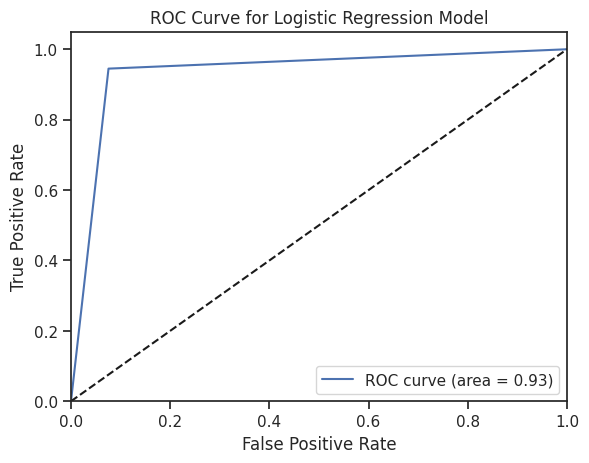

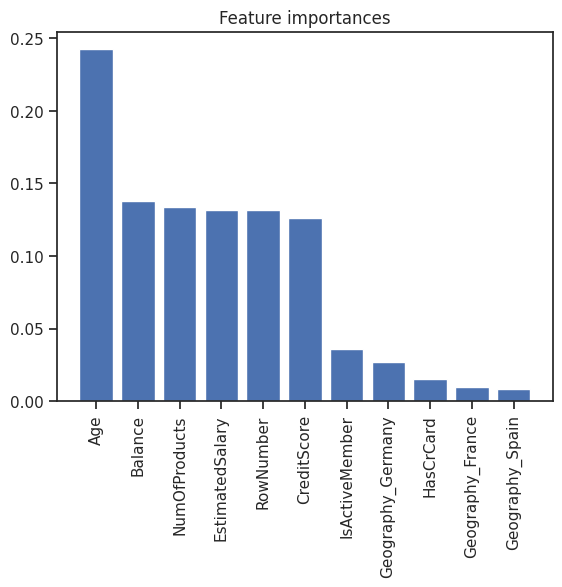

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1600
           1       0.90      0.94      0.92      1108

    accuracy                           0.93      2708
   macro avg       0.93      0.93      0.93      2708
weighted avg       0.93      0.93      0.93      2708

[[1479  121]
 [  61 1047]]
0.9327917282127031


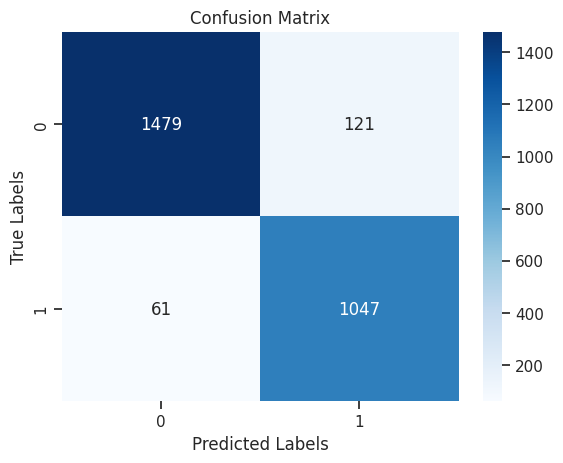

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_rf = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


fpr, tpr, threshold = roc_curve(y_test, y_pred_rf)


roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()



importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_prob = model.predict_proba(X_test)[:,1]


print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))


cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred_gb = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(accuracy_score(y_test, y_pred_gb))



              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1600
           1       0.79      0.71      0.75      1108

    accuracy                           0.81      2708
   macro avg       0.80      0.79      0.79      2708
weighted avg       0.80      0.81      0.80      2708

[[1393  207]
 [ 321  787]]
0.8050221565731167


# SVC

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred_svc = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(accuracy_score(y_test, y_pred_svc))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1600
           1       0.00      0.00      0.00      1108

    accuracy                           0.59      2708
   macro avg       0.30      0.50      0.37      2708
weighted avg       0.35      0.59      0.44      2708

[[1600    0]
 [1108    0]]
0.5908419497784343


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred_knn = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1600
           1       0.58      0.62      0.60      1108

    accuracy                           0.66      2708
   macro avg       0.65      0.66      0.66      2708
weighted avg       0.67      0.66      0.67      2708

[[1114  486]
 [ 423  685]]
0.664327917282127


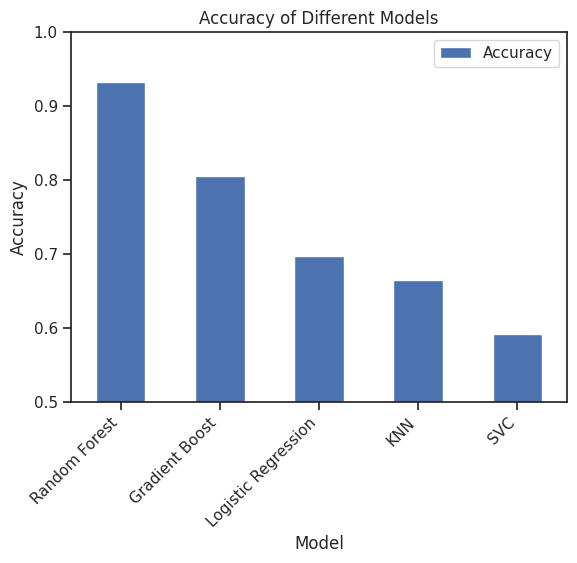

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


accuracy_dict = {'Logistic Regression': accuracy_score(y_test, y_pred_lr),
                 'Random Forest': accuracy_score(y_test, y_pred_rf),
                 'Gradient Boost': accuracy_score(y_test, y_pred_gb),
                 'SVC': accuracy_score(y_test, y_pred_svc),
                 'KNN': accuracy_score(y_test, y_pred_knn)}


accuracy_df = pd.DataFrame.from_dict(accuracy_dict, orient='index', columns=['Accuracy'])


accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)


ax = accuracy_df.plot(kind='bar', rot=0)
ax.set_xticklabels(accuracy_df.index, rotation=45, ha="right")
plt.ylim([0.5, 1.0])
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
